In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [12]:
# loading the data as csv
data = pd.read_csv("data/loan_cleaned.csv")

In [13]:
# X/y split
y = data['status']
X = data.drop(["status"], axis = 1)

In [14]:
X.columns

Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'dtir1', 'dmy_ncf', 'dmy_pre', 'dmy_type2', 'dmy_type3',
       'dmy_p2', 'dmy_p3', 'dmy_p4', 'dmy_l2', 'dmy_opc', 'dmy_nob/c',
       'dmy_not_neg', 'dmy_not_int', 'dmy_not_lpsm', 'dmy_sb', 'dmy_pr',
       'dmy_sr', 'dmy_land', 'dmy_2U', 'dmy_3U', 'dmy_4U', 'dmy_CRIF',
       'dmy_EQUI', 'dmy_EXP', 'dmy_EXP.1', 'dmy_35-44', 'dmy_45-54',
       'dmy_55-64', 'dmy_65-74', 'dmy_<25', 'dmy_>74', 'dmy_to_inst',
       'dmy_North-East', 'dmy_central', 'dmy_south', 'dmy_direct'],
      dtype='object')

In [15]:
# train / test split 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, random_state=42)

In [16]:
# upsampling with Smote
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

0    89537
1    89537
Name: status, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# scale the data with standardscaler
scaler = StandardScaler()
X_train_scaled_sm = scaler.fit_transform(X_sm)
X_test_scaled=scaler.transform(X_test)

In [19]:
# loading the model
log_model = LogisticRegression()

In [20]:
import matplotlib.pyplot as plt

,Error_metric,Train,Test
0,Accuracy,0.864827,0.837324
1,Precision,0.914426,0.716292
2,Recall,0.804986,0.549586


Confusion matrix for the train set
[[82792  6745]
 [17461 72076]]


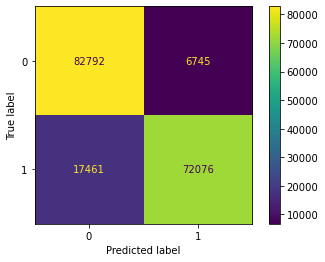



Confusion matrix for the test set
[[20918  1576]
 [ 3261  3979]]


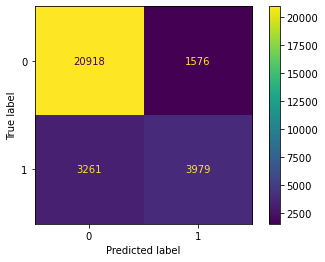

In [21]:
#fit the smoted data into the model
log_model.fit(X_train_scaled_sm, y_sm)

# predict on X train scaled and x test scaled and safe in variable
y_pred_train_log = log_model.predict(X_train_scaled_sm)
y_pred_test_log = log_model.predict(X_test_scaled)

#Create a dataframe for the Train and Test results
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm, y_pred_train_log),
                                         precision_score(y_sm, y_pred_train_log),
                                         recall_score(y_sm, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})
# display the dataframe
display(performance_log)

# print the confusion matrix for the train set
print("Confusion matrix for the train set")
print(confusion_matrix(y_sm,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled_sm,y_sm, values_format = 'd')
plt.show()

print()
print()

# print the confusion matrix for the test set
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()